In [79]:
from bokeh.plotting import figure, show
from bokeh.colors import named
from bokeh.models import ColumnDataSource
from bokeh.models.tools import HoverTool
import bokeh.io
import bokeh.plotting as bp
from math import pi
from bokeh.transform import dodge
from collections import Counter
import pandas as pd
import numpy as np
from bokeh.palettes import Category20c
from bokeh.transform import cumsum
import geopandas
from bokeh.plotting import figure

import warnings
warnings.filterwarnings("ignore")


#### Reading the DATA

In [80]:
data = pd.read_csv('RIMResultatElection2024.csv', sep=",")
gdf = geopandas.read_file("shape/mrt_admbnda_adm2_gov_20200801.shp")
gdf.head()

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry
0,7.796904,1.345188,Akjoujt,MR0901,None,None,None,Inchiri,MR09,Mauritania,MR,2020-06-12,2020-07-31,0000/00/00,"POLYGON ((-15.2212 19.0112, -15.2397 19.0162, ..."
1,5.166369,1.331737,Aleg,MR0301,None,None,None,Brakna,MR03,Mauritania,MR,2020-06-12,2020-07-31,0000/00/00,"POLYGON ((-13.2468 17.3021, -13.2014 17.2625, ..."
2,3.972024,0.766927,Amourj,MR0701,None,None,None,Hodh El Chargi,MR07,Mauritania,MR,2020-06-12,2020-07-31,0000/00/00,"POLYGON ((-7.1439 16.1021, -7.1226 16.0984, -6..."
3,6.744630,2.102095,Aoujeft,MR0101,None,None,None,Adrar,MR01,Mauritania,MR,2020-06-12,2020-07-31,0000/00/00,"POLYGON ((-11.8715 19.1973, -12.0862 19.0671, ..."
4,0.150527,0.001420,Arafat,MR1001,None,None,None,Nouakchott,MR10,Mauritania,MR,2020-06-12,2020-07-31,0000/00/00,"POLYGON ((-15.9408 18.0502, -15.9427 18.047, -..."


In [81]:
data.tail()

,codeWilaya,Wilaya,MoughataaFr,Commune,Center,bureau,Candidat,Wilaya_ar,MoughataaAr,Commune_ar,Center_ar,bureau_ar,CandidatAr,Type,TypeAr,nbr_Inscrits,nb_bulletin,nb_votant_neutre,nb_votant_null,nb_vote
31516,0,Etranger,Amerique,USA,Washington,Washington 01,Hamadi Sid’El Moctar Mohamed Abdi,الخارج,أمريكا,الولايات المتحدة,واشنطن,واشنطن 01,حمادى سيد المختار محمد عبدى,Présidentielles,الرئاسية,365,141,3,4,29
31517,0,Etranger,Amerique,USA,Washington,Washington 01,Outouma Antoine Souleymane Soumaré,الخارج,أمريكا,الولايات المتحدة,واشنطن,واشنطن 01,أوتوما أنتوان سليمان سومارى,Présidentielles,الرئاسية,365,141,3,4,16
31518,0,Etranger,Amerique,USA,Washington,Washington 01,Mamadou Bocar Ba,الخارج,أمريكا,الولايات المتحدة,واشنطن,واشنطن 01,مامادو بوكار با,Présidentielles,الرئاسية,365,141,3,4,1
31519,0,Etranger,Amerique,USA,Washington,Washington 01,El Id Mohameden M’Bareck,الخارج,أمريكا,الولايات المتحدة,واشنطن,واشنطن 01,العيد محمدن امبارك,Présidentielles,الرئاسية,365,141,3,4,13
31520,0,Etranger,Amerique,USA,Washington,Washington 01,Biram Dah Abeid,الخارج,أمريكا,الولايات المتحدة,واشنطن,واشنطن 01,بيرام الداه اعبيد,Présidentielles,الرئاسية,365,141,3,4,28


In [82]:
data.columns

Index(['codeWilaya', 'Wilaya', 'MoughataaFr', 'Commune', 'Center', 'bureau',
       'Candidat', 'Wilaya_ar', 'MoughataaAr', 'Commune_ar', 'Center_ar',
       'bureau_ar', 'CandidatAr', 'Type', 'TypeAr', 'nbr_Inscrits',
       'nb_bulletin', 'nb_votant_neutre', 'nb_votant_null', 'nb_vote'],
      dtype='object')

In [83]:
# Calculate nbSuffrage before renaming the columns
data['nbSuffrage'] = data['nb_bulletin'] - data['nb_votant_null'] - data['nb_votant_neutre']

# Mapping columns from 2019 to 2024
selected_columns_2024 = [
    'codeWilaya', 'Wilaya', 'MoughataaFr', 'Commune', 'Center', 'bureau',
    'nbr_Inscrits', 'nb_bulletin', 'nb_votant_null', 'nb_votant_neutre', 'nb_vote', 'Candidat', 'nbSuffrage'
]

# Limit the DataFrame to the selected columns
data = data[selected_columns_2024]

# Rename columns to match the 2019 dataset format
data.columns = [
    'CodeWilaya', 'Wilaya', 'Moughataa', 'Commune', 'Center', 'CodeBureau',
    'NbInscrits', 'nbVotant', 'nbVoteNull', 'nbVoteNeutre', 'nbVoix', 'Candidat', 'nbSuffrage'
]



#### Extracting the right dataframe that will serves us in our task

In [85]:
import pandas as pd

# Assuming 'election' DataFrame is already created
election=data[['Wilaya','nbSuffrage','nbVoix','Moughataa','Candidat', 'CodeWilaya']]


# Extracting the last name
election['prenom'] = election['Candidat'].apply(lambda x: x.split()[-1])


In [86]:
# Define the replacement mapping
replacements = {
    'Abdi': 'Hamadi',
    'M’Bareck': 'El Id',
    'Abeid': 'Biram'
}

# Replace the modalities in the 'prenom' column
election['prenom'] = election['prenom'].replace(replacements)

# Displaying the updated DataFrame
election.head(7)


,Wilaya,nbSuffrage,nbVoix,Moughataa,Candidat,CodeWilaya,prenom
0,Etranger,242,66,Afrique,Mohamed Cheikh Ghazouani,0,Ghazouani
1,Etranger,242,1,Afrique,Mohamed Lemine El Mourteji El Wavi,0,Wavi
2,Etranger,242,138,Afrique,Hamadi Sid’El Moctar Mohamed Abdi,0,Hamadi
3,Etranger,242,0,Afrique,Outouma Antoine Souleymane Soumaré,0,Soumaré
4,Etranger,242,0,Afrique,Mamadou Bocar Ba,0,Ba
5,Etranger,242,6,Afrique,El Id Mohameden M’Bareck,0,El Id
6,Etranger,242,31,Afrique,Biram Dah Abeid,0,Biram


In [93]:
election['Moughataa'] = election['Moughataa'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
election['Moughataa']=election['Moughataa'].str.lower()

In [94]:
grouped_cand = election.groupby(['prenom', 'Wilaya'], as_index=False).agg({
    'nbSuffrage': 'sum',
    'nbVoix': 'sum',
    'Moughataa': 'first',
    'Candidat': 'first',
    'CodeWilaya': 'first'
})

In [95]:
grouped_cand.head()

,prenom,Wilaya,nbSuffrage,nbVoix,Moughataa,Candidat,CodeWilaya
0,Ba,Adrar,27299,134,atar,Mamadou Bocar Ba,7
1,Ba,Assaba,83371,420,kiffa,Mamadou Bocar Ba,3
2,Ba,Brakna,103200,5724,aleg,Mamadou Bocar Ba,5
3,Ba,Dakhlet Nouadhibou,45852,1436,nouadhibou,Mamadou Bocar Ba,8
4,Ba,Etranger,14217,517,afrique,Mamadou Bocar Ba,0


In [96]:
grouped_cand['percent_votes'] = (grouped_cand['nbVoix'] / grouped_cand['nbSuffrage']) * 100
grouped_cand['percent_votes'] = grouped_cand['percent_votes'].round(2)

wilaya_vote_percent = grouped_cand.pivot(index='Wilaya', columns='prenom', values='percent_votes')
wilaya_vote_percent.columns.name = None


In [97]:

wilaya_vote = grouped_cand.pivot(index='Wilaya', columns='prenom', values='nbVoix')
wilaya_vote

prenom,Ba,Biram,El Id,Ghazouani,Hamadi,Soumaré,Wavi
Wilaya,,,,,,,
Adrar,134,2373,590,20193,3495,263,251
Assaba,420,14677,1844,53843,11319,304,964
Brakna,5724,19338,7016,59853,9479,1029,761
Dakhlet Nouadhibou,1436,18839,2202,16454,5853,804,264
Etranger,517,4212,496,4562,2868,1506,56
Gorgol,6076,23667,5773,38056,3296,1391,749
Guidimagha,1923,18621,1282,22037,3950,5224,501
Hodh Chargui,283,6479,1038,78650,11359,386,1999
Hodh El Gharbi,330,5763,1131,53390,13692,264,1057


In [98]:
from bokeh.io import save, output_file
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.transform import dodge
from math import pi

# Assuming wilaya_vote is already defined
source = ColumnDataSource(wilaya_vote)

# Create a Bokeh figure
p1 = figure(x_range=source.data['Wilaya'].tolist(), toolbar_location=None, tools="", title='Wilaya Vote', width=750)

# Add bars for each candidate
candidates = wilaya_vote.columns.tolist()
print(candidates)

# Updated color palette with 7 distinct colors
colors = ["#FDE724", "#6495ED", "#3CB371", "#FFA500", "#000000", "#FF6347", "#8A2BE2"]

# Ensure we have enough colors for all candidates
while len(colors) < len(candidates):
    colors += colors[:len(candidates) - len(colors)]

# Plot each candidate's votes
for idx, candidate in enumerate(candidates):
    p1.vbar(x=dodge('Wilaya', -0.25 + idx*0.1, range=p1.x_range), top=candidate, width=0.1, source=source, color=colors[idx], legend_label=candidate)

# Configure the legend
p1.legend.label_text_font_size = "6pt"
p1.legend.location = "top_right"
p1.legend.orientation = "horizontal"
p1.legend.border_line_color = "#c9d9d3"

# Configure the x-axis
p1.xaxis.major_label_orientation = pi/3
p1.xgrid.grid_line_color = None
p1.ygrid.grid_line_color = '#225ea8'

# Display the plot
show(p1)

# Save the plot as an HTML file
output_file("wilaya_vote.html")
save(p1)


['Ba', 'Biram', 'El Id', 'Ghazouani', 'Hamadi', 'Soumaré', 'Wavi']


'C:\\Users\\DELL XPS\\Downloads\\election\\wilaya_vote.html'

In [78]:
import pandas as pd
from bokeh.io import show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource
from bokeh.layouts import gridplot

# Assuming wilaya_vote is already defined and has new prenom values

# Extracting unique candidate names from the 'prenom' column
candidates = wilaya_vote.columns.tolist()

# Define colors for the candidates
colors = ["#FDE724", "#6495ED", "#3CB371", "#FFA500", "#000000", "#FF6347", "#8A2BE2"]

# Ensure we have enough colors for all candidates
while len(colors) < len(candidates):
    colors += colors[:len(candidates) - len(colors)]

# Create figures for each candidate
figures = []
for i, candidate in enumerate(candidates):
    wilaya_vote_sorted = wilaya_vote.sort_values(by=candidate, ascending=True)
    source = ColumnDataSource(data=dict(wilaya=wilaya_vote_sorted.index.tolist(), candidate=wilaya_vote_sorted[candidate]))
    
    p = figure(y_range=wilaya_vote_sorted.index.tolist(), width=450, title=f"Number of votes for {candidate} by Wilaya",
               toolbar_location=None, tools="")
    p.hbar(y='wilaya', right='candidate', height=0.3, source=source, 
           line_color='white', fill_color=colors[i])
    p.ygrid.grid_line_color = None
    p.x_range.start = 0
    p.x_range.end = wilaya_vote_sorted[candidate].max() + 10  # Slightly extending the range for better visualization
    p.legend.orientation = "vertical"
    p.legend.location = "top_left"
    figures.append(p)

# Create a gridplot of the figures
grid = gridplot([figures[i:i+2] for i in range(0, len(figures), 2)], toolbar_location=None)

# Display the gridplot
show(grid)


In [105]:
data['Moughataa'].unique()

array(['afrique', 'europe', 'asie', 'nema', 'amourj', 'bassiknou',
       'djiguenni', 'timbedra', 'oualata', "n'beiket lahwach", 'aioun',
       'tamcheket', 'koubenni', 'tintane', 'kiffa', 'kankoussa',
       'boumdeid', 'guerou', 'barkeol', 'kaedi', 'monguel', 'maghama',
       "m'bout", 'aleg', 'bababe', "m'bagne", 'magtalahjar', 'boghe',
       'rosso', 'ouad naga', 'keur macene', "r'kiz", 'boutilimit',
       'mederdra', 'atar', 'aoujeft', 'ouadane', 'chinguitti',
       'nouadhibou', 'chami', 'tidjikja', 'moudjeria', 'tichit',
       'selibaby', 'ould yenge', 'ghabou', 'zoueratt', "f'deirick",
       'bir moghrein', 'akjoujt', 'bennechab', 'tevragh zeina', 'sebkha',
       'ksar', 'dar naim', 'toujounine', 'teyaret', 'arafat', 'el mina',
       'riyad', 'adelbegrou', 'touil', 'lexeiba1', 'male', 'tekane',
       'wompou', 'amerique'], dtype=object)

In [99]:
Map_of_moughataa = {
"akjoujt":"MR0901",
"aleg":"MR0301",
"amourj":"MR0701",
"aoujeft":"MR0101",
"arafat":"MR1001",
"atar":"MR0102",
"aioun":"MR0801",
"bababe":"MR0302",
"barkeol":"MR0201",
"bassiknou":"MR0702",
"bennechab":"MR0902",
"bir moghrein":"MR1301",
"boghe":"MR0303",
"boumdeid":"MR0202",
"boutilimit":"MR1201",
"chami":"MR0401",
"chinguitti":"MR0103",
"dar naim":"MR1002",
"djiguenni":"MR0703",
"el mina":"MR1003",
"f'deirick":"MR1302",
"ghabou":"MR0601",
"guerou":"MR0203",
"kankoussa":"MR0204",
"kaedi":"MR0501",
"keur macene":"MR1202",
"kiffa":"MR0205",
"koubenni":"MR0802",
"ksar":"MR1004",
"m'bagne":"MR0305",
"m'bout":"MR0503",
"maghama":"MR0502",
"magtalahjar":"MR0304",
"mederdra":"MR1203",
"monguel":"MR0504",
"moudjeria":"MR1101",
"n'beiket lahwach":"MR0705",
"nouadhibou":"MR0402",
"nema":"MR0704",
"ouad naga":"MR1204",
"ouadane":"MR0104",
"oualata":"MR0706",
"ould yenge":"MR0602",
"r'kiz":"MR1205",
"riyad":"MR1005",
"rosso":"MR1206",
"sebkha":"MR1006",
"selibaby":"MR0603",
"tamcheket":"MR0803",
"tevragh zeina":"MR1007",
"teyaret":"MR1008",
"tichit":"MR1102",
"tidjikja":"MR1103",
"timbedra":"MR0707",
"tintane":"MR0804",
"toujounine":"MR1009",
"zoueratt":"MR1303"}


In [100]:
grouped_cand_M = election.groupby(['prenom','Moughataa']).sum().reset_index()
grouped_cand_M['percent_votes'] = (grouped_cand_M['nbVoix'] / grouped_cand_M['nbSuffrage']) * 100
grouped_cand_M['percent_votes'] = grouped_cand_M['percent_votes'].round(4)

# moughataa_vote_percent = grouped_cand_M.pivot(index='Moughataa', columns='prenom', values='percent_votes')
# moughataa_vote_percent.columns.name = None

moughataa_vote = grouped_cand_M.pivot(index='Moughataa', columns='prenom', values='percent_votes')
new_cand=moughataa_vote.idxmax(axis=1)
moughataa_vote['President']=new_cand
moughataa_vote.head()

prenom,Ba,Biram,El Id,Ghazouani,Hamadi,Soumaré,Wavi,President
Moughataa,,,,,,,,
adelbegrou,0.2108,6.6310,0.6938,85.6930,4.9359,0.2108,1.6248,Ghazouani
afrique,0.2786,37.0045,3.0855,27.8766,30.5764,0.5571,0.6214,Biram
aioun,0.2842,7.2495,2.6483,72.8520,15.2125,0.3265,1.4269,Ghazouani
akjoujt,3.1725,13.3289,3.9877,64.5517,12.9985,1.1677,0.7931,Ghazouani
aleg,0.3097,11.7046,1.2919,71.8246,13.5820,0.4548,0.8322,Ghazouani


In [101]:
data['Moughataa'] = data['Moughataa'].str.normalize('NFKD').str.encode('ascii',
                                                                                   errors='ignore').str.decode('utf-8')
data['Moughataa']=data['Moughataa'].str.lower()


In [102]:
code=data['Moughataa'].map(Map_of_moughataa)

In [103]:
code

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
31516    NaN
31517    NaN
31518    NaN
31519    NaN
31520    NaN
Name: Moughataa, Length: 31521, dtype: object

In [39]:
data['ADM2_PCODE']=code
data['ADM2_PCODE']


0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
31516    NaN
31517    NaN
31518    NaN
31519    NaN
31520    NaN
Name: ADM2_PCODE, Length: 31521, dtype: object

In [40]:
moughataa_vote['ADM2_PCODE'] = data['ADM2_PCODE']
moughataa_vote.head()

prenom,Abdi,Abeid,Ba,Ghazouani,M’Bareck,Soumaré,Wavi,President,ADM2_PCODE
Moughataa,,,,,,,,,
adelbegrou,4.9359,6.6310,0.2108,85.6930,0.6938,0.2108,1.6248,Ghazouani,NaN
afrique,30.5764,37.0045,0.2786,27.8766,3.0855,0.5571,0.6214,Abeid,NaN
aioun,15.2125,7.2495,0.2842,72.8520,2.6483,0.3265,1.4269,Ghazouani,NaN
akjoujt,12.9985,13.3289,3.1725,64.5517,3.9877,1.1677,0.7931,Ghazouani,NaN
aleg,13.5820,11.7046,0.3097,71.8246,1.2919,0.4548,0.8322,Ghazouani,NaN


In [41]:

grouped_cand_M['Moughataa']=grouped_cand_M.index
grouped_cand_M['ADM2_PCODE']=code


In [42]:
mapmauritnia = gdf.merge(moughataa_vote, on='ADM2_PCODE')
mapmauritnia.shape

(0, 23)

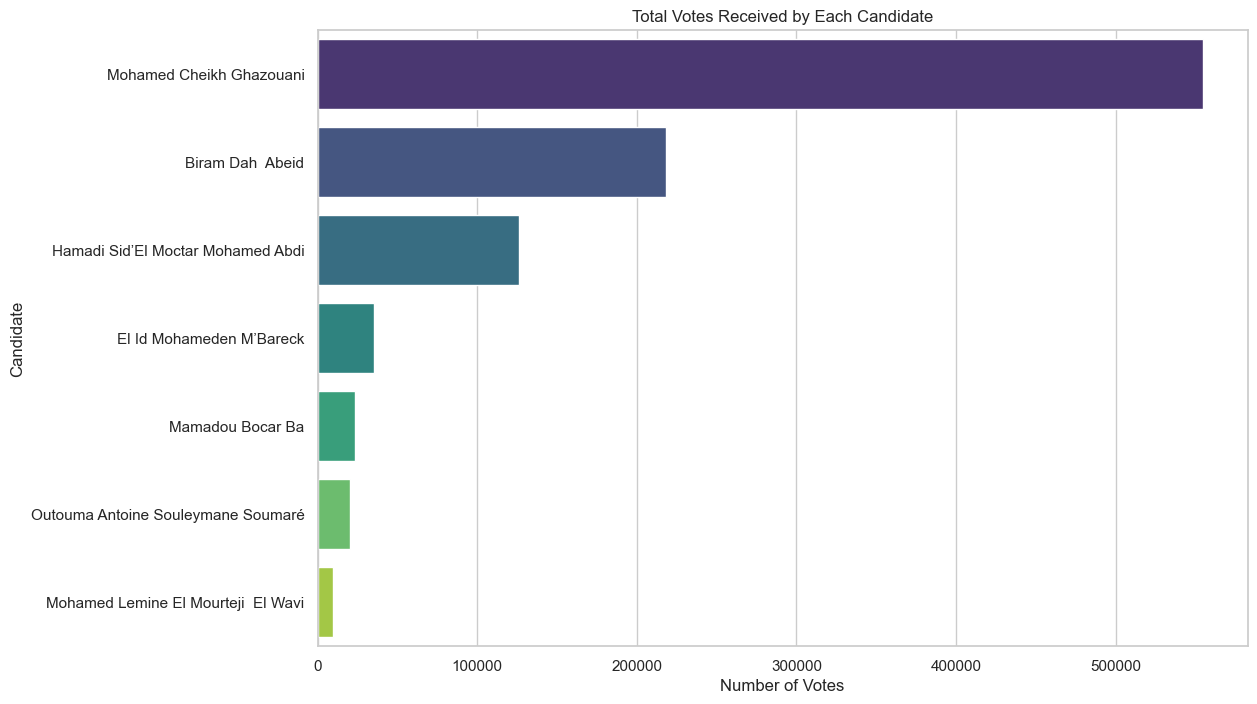

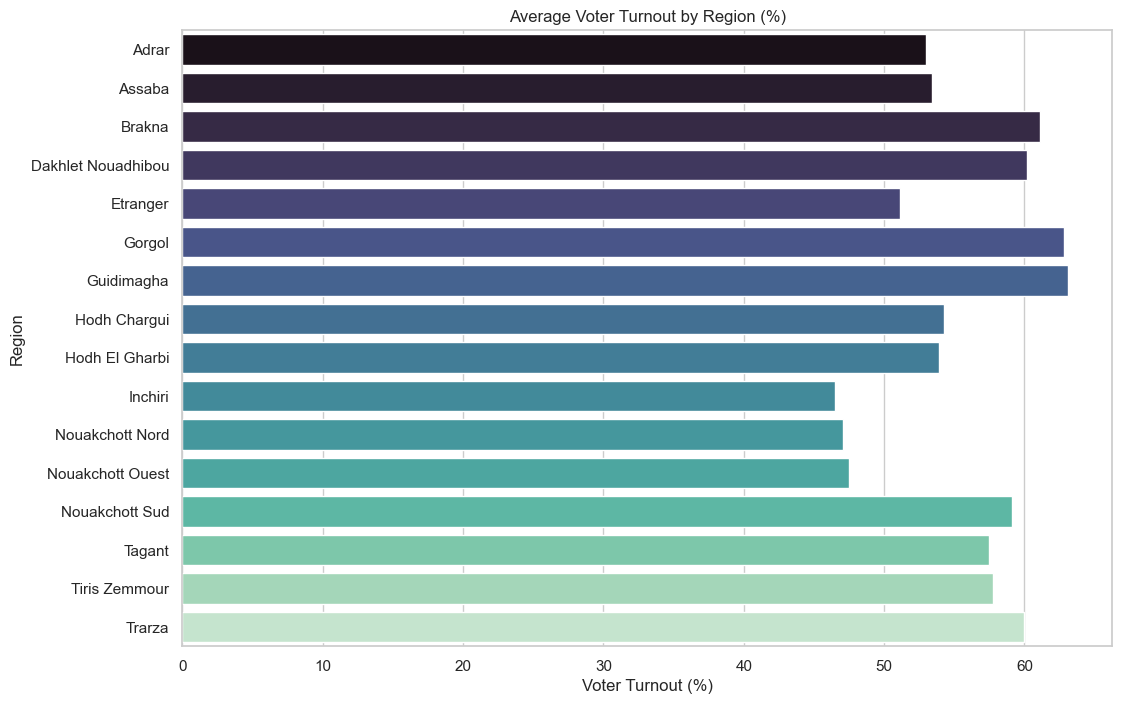

<Figure size 1200x800 with 0 Axes>

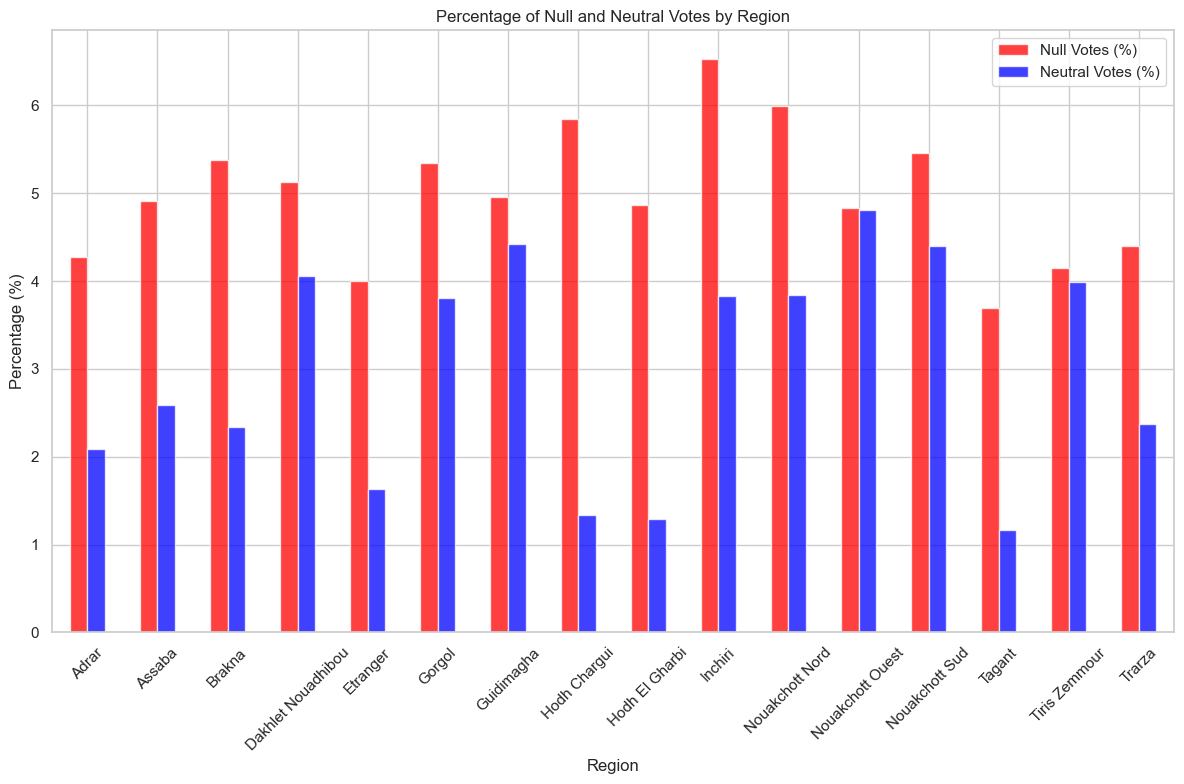

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Visualization 1: Total number of votes received by each candidate
candidate_votes = data.groupby('Candidat')['nbVoix'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=candidate_votes.values, y=candidate_votes.index, palette="viridis")
plt.title('Total Votes Received by Each Candidate')
plt.xlabel('Number of Votes')
plt.ylabel('Candidate')
plt.show()

# Visualization 2: Voter turnout by region
data['Turnout'] = data['nbVotant'] / data['NbInscrits'] * 100
region_turnout = data.groupby('Wilaya')['Turnout'].mean()

plt.figure(figsize=(12, 8))
sns.barplot(x=region_turnout.values, y=region_turnout.index, palette="mako")
plt.title('Average Voter Turnout by Region (%)')
plt.xlabel('Voter Turnout (%)')
plt.ylabel('Region')
plt.show()

# Visualization 3: Distribution of null and neutral votes as a percentage of total votes
data['NullVotesPct'] = data['nbVoteNull'] / data['nbVotant'] * 100
data['NeutralVotesPct'] = data['nbVoteNeutre'] / data['nbVotant'] * 100
null_neutral_votes_pct = data.groupby('Wilaya')[['NullVotesPct', 'NeutralVotesPct']].mean()

plt.figure(figsize=(12, 8))
null_neutral_votes_pct.plot(kind='bar', color=['red', 'blue'], alpha=0.75, figsize=(12, 8))
plt.title('Percentage of Null and Neutral Votes by Region')
plt.ylabel('Percentage (%)')
plt.xlabel('Region')
plt.legend(['Null Votes (%)', 'Neutral Votes (%)'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


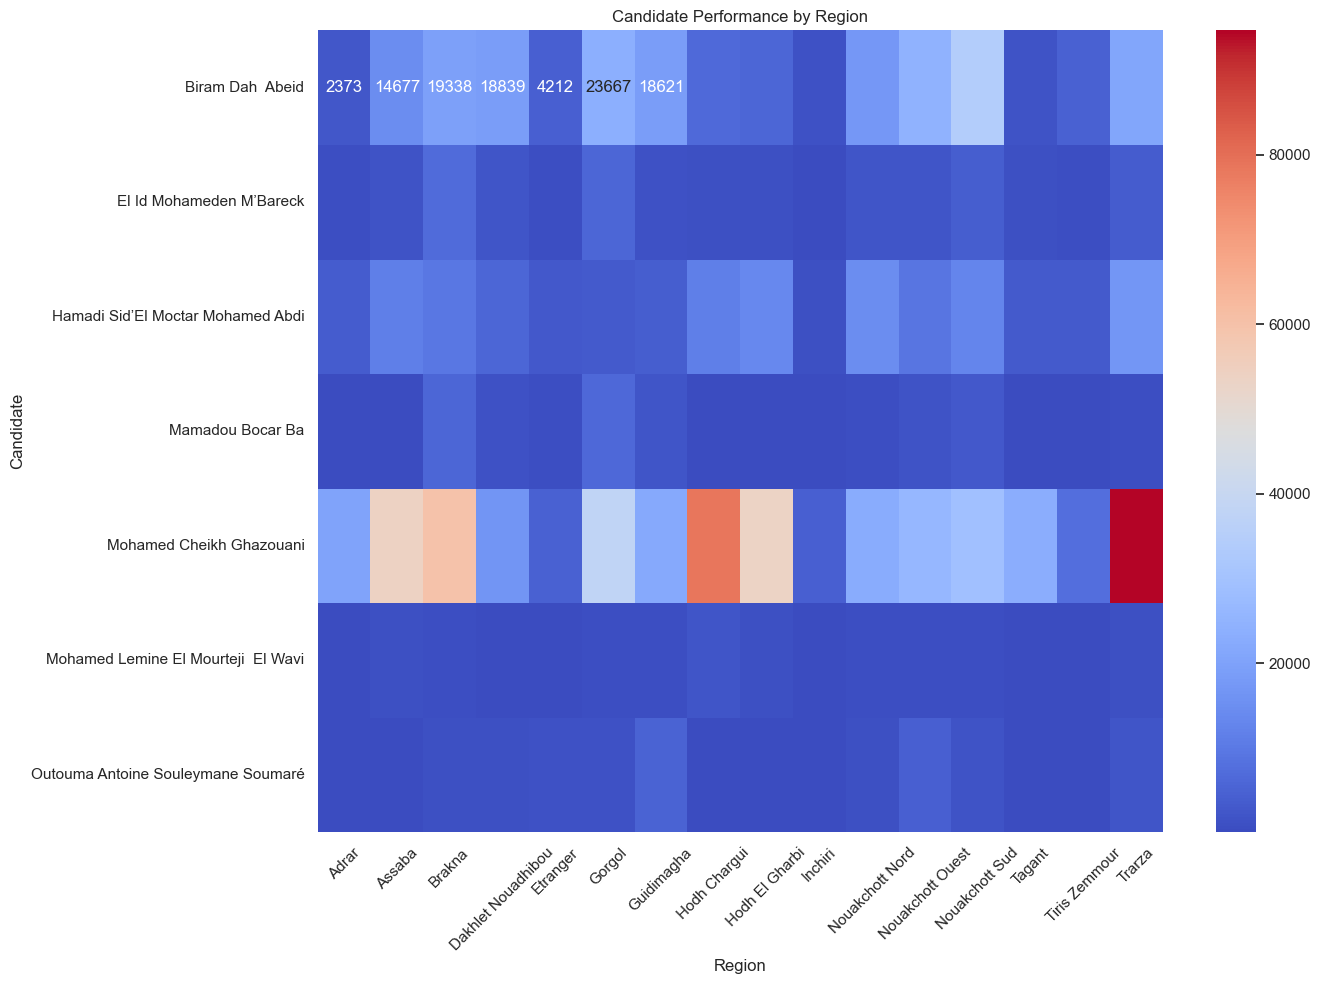

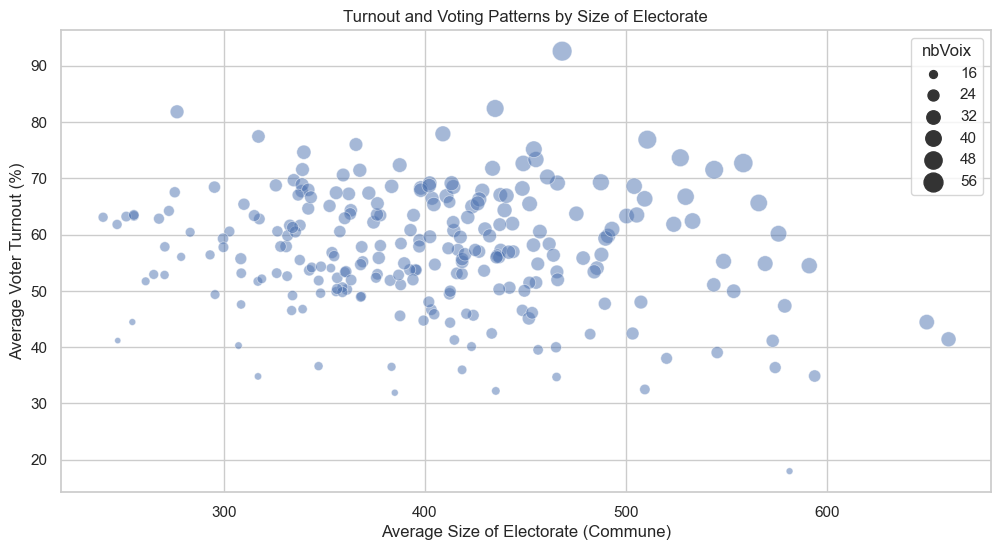

In [44]:
# Visualization 4: Candidate Performance by Region
# Pivot table to sum votes by candidate and region
candidate_region_performance = data.pivot_table(values='nbVoix', index='Candidat', columns='Wilaya', aggfunc='sum', fill_value=0)

# Plotting
plt.figure(figsize=(14, 10))
sns.heatmap(candidate_region_performance, annot=True, cmap='coolwarm', fmt="d")
plt.title('Candidate Performance by Region')
plt.ylabel('Candidate')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization 5: Turnout and Voting Patterns by Size of Electorate
# Calculating average turnout and average votes per candidate per size of electorate in each commune
commune_size_turnout = data.groupby('Commune').agg({
    'NbInscrits': 'mean',  # Average size of electorate
    'Turnout': 'mean',  # Average turnout
    'nbVoix': 'mean'  # Average votes per candidate
}).reset_index()

# Scatter plot for Turnout vs. Electorate Size
plt.figure(figsize=(12, 6))
sns.scatterplot(data=commune_size_turnout, x='NbInscrits', y='Turnout', size='nbVoix', sizes=(20, 200), alpha=0.5, palette='magma')
plt.title('Turnout and Voting Patterns by Size of Electorate')
plt.xlabel('Average Size of Electorate (Commune)')
plt.ylabel('Average Voter Turnout (%)')
plt.grid(True)
plt.show()


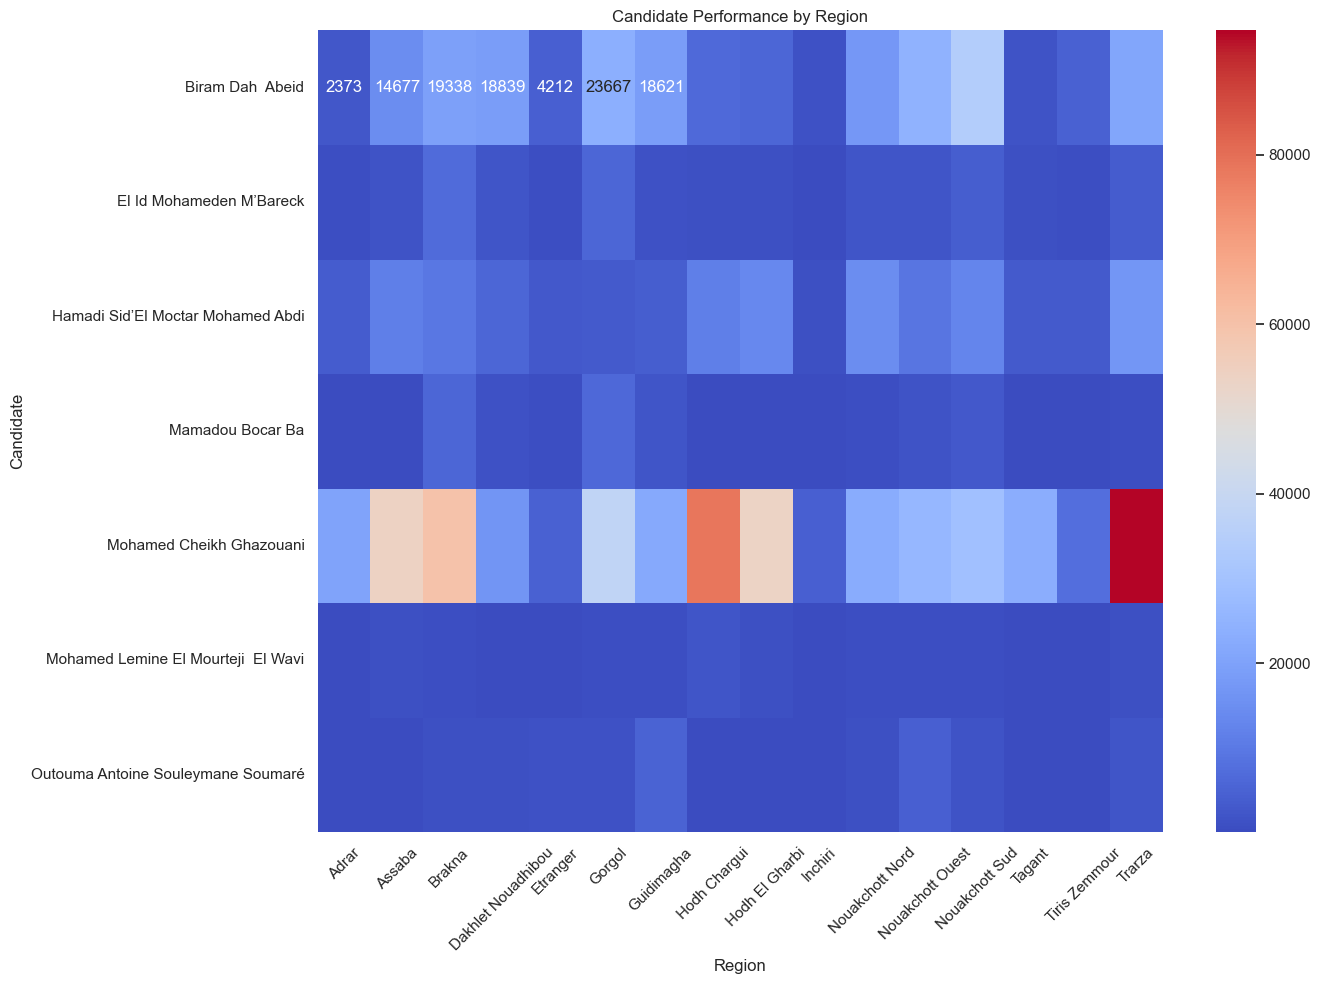

In [45]:
# Attempting to plot the heatmap for Candidate Performance by Region again
plt.figure(figsize=(14, 10))
sns.heatmap(candidate_region_performance, annot=True, cmap='coolwarm', fmt="d")
plt.title('Candidate Performance by Region')
plt.ylabel('Candidate')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
